# Proyek Analisis Data: Brazillian Ecommerce
- Nama: Dimas Wahyu Nur Muhammad
- Email: dimaswahyunm@gmail.com
- Id Dicoding: dimas_wnm

## Menentukan Pertanyaan Bisnis

- pertanyaan 1: berapa banyak order dan omset pada setiap bulan
- pertanyaan 2: breakdown total order dan omset pada setiap kota
- pertanyaan 3: breakdown total order dan omset pada setiap kategori produk
- pertanyaan 4: berapa rata-rata durasi pengiriman
- pertanyaan 5: bagaimana distribusi customer
- pertanyaan 6: bagaimana distribusi seller
- pertanyaan 7: improvement yang bisa dilakukan? memangkas durasi / menaikkan order/omset


## Menyiapkan semua library yang dibutuhkan

In [16]:
#!pip install pandas numpy matplotlib seaborn sqldf streamlit

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqldf
import streamlit as st

## Data Wrangling

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Gathering Data

In [19]:
customers = pd.read_csv('/data/customers_dataset.csv')
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [20]:
geolocation = pd.read_csv('/data/geolocation_dataset.csv')
geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [21]:
order_items = pd.read_csv('/data/order_items_dataset.csv')
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [22]:
order_payments = pd.read_csv('/data/order_payments_dataset.csv')
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [23]:
order_reviews = pd.read_csv('/data/order_reviews_dataset.csv')
order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [24]:
orders = pd.read_csv('/data/orders_dataset.csv')
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [25]:
product_category = pd.read_csv('/data/product_category_name_translation.csv')
product_category.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [26]:
products = pd.read_csv('/data/products_dataset.csv')
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [27]:
sellers = pd.read_csv('/data/sellers_dataset.csv')
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Assessing Data

Check the null values from each dataset

In [28]:
# function to check column type from dataset
def check_column_type(dataset):
    dataset_name =[x for x in globals() if globals()[x] is dataset][0]
    print(dataset_name+'_dataset\n')
    print(dataset.info())

In [29]:
dataset_list = [customers,geolocation,order_items,order_payments,order_reviews,orders,product_category,products,sellers]
for dataset in dataset_list:
  check_column_type(dataset)
  print('\n========================================\n')

customers_dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None


geolocation_dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   

beberapa kolom masih memiliki tipe data yang tidak sesuai, contoh: order_purchase_timestamp seharusnya bertipe datetime

In [30]:
# function to check null values from dataset
def check_null_values(dataset):
    dataset_name =[x for x in globals() if globals()[x] is dataset][0]
    print(dataset_name+'_dataset\n')
    print(dataset.isnull().sum())

In [31]:
dataset_list = [customers,geolocation,order_items,order_payments,order_reviews,orders,product_category,products,sellers]
for dataset in dataset_list:
  check_null_values(dataset)
  print('\n========================================\n')

customers_dataset

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64


geolocation_dataset

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64


order_items_dataset

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64


order_payments_dataset

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64


order_reviews_dataset

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_

order_reviews dataset have 87656 null values in review_comment_title and 58247 null values in review_comment_message column, hal ini mungkin terjadi karena review tidak wajib menyertakan title & message <br>
orders dataset have 160 null values in order_approved_at, 1783 null values in order_delivered_carrier_date, and 2965 null values in order_delivered_customer_date column. Expected jika ada order yang belum di approve dan order yang belum dikirim dan belum terkirim <br>
products dataset have 610 null values in several columns, which are product_category_name, product_name_lenght, product_description_lenght, and product_photos_qty. Kita asumsikan bahwa ada detail product yang belum lengkap dan belum dikategorikan <br>

In [32]:
# function to check duplicated values from dataset
def check_duplicated_values(dataset):
    dataset_name =[x for x in globals() if globals()[x] is dataset][0]
    print(dataset_name+'_dataset\n')
    print('duplicated values: ')
    print(dataset.duplicated().sum())

In [33]:
dataset_list = [customers,geolocation,order_items,order_payments,order_reviews,orders,product_category,products,sellers]
for dataset in dataset_list:
  check_duplicated_values(dataset)
  print('\n========================================\n')

customers_dataset

duplicated values: 
0


geolocation_dataset

duplicated values: 
261831


order_items_dataset

duplicated values: 
0


order_payments_dataset

duplicated values: 
0


order_reviews_dataset

duplicated values: 
0


orders_dataset

duplicated values: 
0


product_category_dataset

duplicated values: 
0


products_dataset

duplicated values: 
0


sellers_dataset

duplicated values: 
0




geolocation dataset have 261831 duplicated values, we can remove the duplicated values to keep the unique value of each row

### Cleaning Data

remove duplicated values in geolocation dataset

In [34]:
geolocation = geolocation.drop_duplicates()
check_duplicated_values(geolocation)

geolocation_dataset

duplicated values: 
0


convert several object column to datetime

In [35]:
# function to convert multiple object columns to datetime columns
def convert_object_to_datetime(dataset,columns):
  for column in columns:
    dataset[column] = pd.to_datetime(dataset[column])

In [36]:
convert_object_to_datetime(orders,['order_purchase_timestamp','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date'])
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [37]:
convert_object_to_datetime(order_reviews,['review_creation_date','review_answer_timestamp'])
order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


In [38]:
convert_object_to_datetime(order_items,['shipping_limit_date'])
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


## Exploratory Data Analysis (EDA)

### Explore ...

In [39]:
# function to check duplicated values from dataset
def describe_data(dataset):
    dataset_name =[x for x in globals() if globals()[x] is dataset][0]
    print(dataset_name+'_dataset\n')
    print(dataset.describe())

In [40]:
dataset_list = [customers,geolocation,order_items,order_payments,order_reviews,orders,product_category,products,sellers]
for dataset in dataset_list:
  describe_data(dataset)
  print('\n========================================\n')

customers_dataset

       customer_zip_code_prefix
count              99441.000000
mean               35137.474583
std                29797.938996
min                 1003.000000
25%                11347.000000
50%                24416.000000
75%                58900.000000
max                99990.000000


geolocation_dataset

       geolocation_zip_code_prefix  geolocation_lat  geolocation_lng
count                738332.000000    738332.000000    738332.000000
mean                  38316.086800       -20.998353       -46.461098
std                   30632.496675         5.892315         4.393705
min                    1001.000000       -36.605374      -101.466766
25%                   12600.000000       -23.603061       -48.867822
50%                   29144.000000       -22.873588       -46.647278
75%                   65950.000000       -19.923336       -43.836974
max                   99990.000000        45.065933       121.105394


order_items_dataset

       order_item_id      

<ipython-input-39-63b341645c5d>:5: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(dataset.describe())
<ipython-input-39-63b341645c5d>:5: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(dataset.describe())
<ipython-input-39-63b341645c5d>:5: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(dataset.describe())
<ipython-input-39-63b341645c5d>:5: FutureWarning: Treating datetime da

Grouping dataset to create 2 big tables <br>
- fact_order
- fact_order_detail

In [41]:
query_fact_order = """
SELECT
  date(order_purchase_timestamp) as order_purchase_date,
  orders.order_id,
  orders.customer_id,
  order_status,
  order_purchase_timestamp,
  order_approved_at,
  order_delivered_carrier_date,
  order_delivered_customer_date,
  order_estimated_delivery_date,
  payment_sequential,
  payment_type,
  payment_installments,
  payment_value,
  review_id,
  review_score,
  review_comment_title,
  review_comment_message,
  review_creation_date,
  review_answer_timestamp,
  customer_unique_id,
  customer_city,
  customer_state
FROM orders
LEFT JOIN order_payments
ON orders.order_id = order_payments.order_id
LEFT JOIN order_reviews
ON orders.order_id = order_reviews.order_id
LEFT JOIN customers
ON orders.customer_id = customers.customer_id
"""

In [42]:
fact_order = sqldf.run(query_fact_order)
fact_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104478 entries, 0 to 104477
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_purchase_date            104478 non-null  object 
 1   order_id                       104478 non-null  object 
 2   customer_id                    104478 non-null  object 
 3   order_status                   104478 non-null  object 
 4   order_purchase_timestamp       104478 non-null  object 
 5   order_approved_at              104302 non-null  object 
 6   order_delivered_carrier_date   102580 non-null  object 
 7   order_delivered_customer_date  101324 non-null  object 
 8   order_estimated_delivery_date  104478 non-null  object 
 9   payment_sequential             104477 non-null  float64
 10  payment_type                   104477 non-null  object 
 11  payment_installments           104477 non-null  float64
 12  payment_value                 

In [43]:
convert_object_to_datetime(fact_order,['order_purchase_date','order_purchase_timestamp','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date','review_creation_date','review_answer_timestamp'])
fact_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104478 entries, 0 to 104477
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_purchase_date            104478 non-null  datetime64[ns]
 1   order_id                       104478 non-null  object        
 2   customer_id                    104478 non-null  object        
 3   order_status                   104478 non-null  object        
 4   order_purchase_timestamp       104478 non-null  datetime64[ns]
 5   order_approved_at              104302 non-null  datetime64[ns]
 6   order_delivered_carrier_date   102580 non-null  datetime64[ns]
 7   order_delivered_customer_date  101324 non-null  datetime64[ns]
 8   order_estimated_delivery_date  104478 non-null  datetime64[ns]
 9   payment_sequential             104477 non-null  float64       
 10  payment_type                   104477 non-null  object        
 11  

In [44]:
fact_order

,order_purchase_date,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,...,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_unique_id,customer_city,customer_state
0,2017-10-02,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,...,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,None,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP
1,2017-10-02,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2.0,...,18.59,a54f0611adc9ed256b57ede6b6eb5114,4.0,None,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP
2,2017-10-02,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,3.0,...,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,None,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP
3,2018-07-24,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,...,141.46,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08,2018-08-08 18:37:50,af07308b275d755c9edb36a90c618231,barreiras,BA
4,2018-08-08,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,...,179.12,e73b67b67587f7644d5bd1a52deb1b01,5.0,None,None,2018-08-18,2018-08-22 19:07:58,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104473,2017-03-09,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,1.0,...,85.08,e262b3f92d1ce917aa412a9406cf61a6,5.0,None,None,2017-03-22,2017-03-23 11:02:08,6359f309b166b0196dbf7ad2ac62bb5a,sao jose dos campos,SP
104474,2018-02-06,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,1.0,...,195.00,29bb71b2760d0f876dfa178a76bc4734,4.0,None,So uma peça que veio rachado mas tudo bem rs,2018-03-01,2018-03-02 17:50:01,da62f9e57a76d978d02ab5362c509660,praia grande,SP
104475,2017-08-27,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,1.0,...,271.01,371579771219f6db2d830d50805977bb,5.0,None,Foi entregue antes do prazo.,2017-09-22,2017-09-22 23:10:57,737520a9aad80b3fbbdad19b66b37b30,nova vicosa,BA
104476,2018-01-08,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,1.0,...,441.16,8ab6855b9fe9b812cd03a480a25058a1,2.0,None,Foi entregue somente 1. Quero saber do outro p...,2018-01-26,2018-01-27 09:16:56,5097a5312c8b157bb7be58ae360ef43c,japuiba,RJ


In [45]:
query_fact_order_detail = """
SELECT
  orders.order_id,
  order_item_id,
  order_items.product_id,
  order_items.seller_id,
  shipping_limit_date,
  price,
  freight_value,
  products.product_category_name,
  product_name_lenght,
  product_description_lenght,
  product_photos_qty,
  product_weight_g,
  product_length_cm,
  product_height_cm,
  product_width_cm,
  product_category_name_english,
  seller_city,
  seller_state
FROM orders
LEFT JOIN order_items
ON orders.order_id = order_items.order_id
LEFT JOIN products
ON order_items.product_id = products.product_id
LEFT JOIN product_category
ON products.product_category_name = product_category.product_category_name
LEFT JOIN sellers
ON order_items.seller_id = sellers.seller_id
"""

In [46]:
fact_order_detail = sqldf.run(query_fact_order_detail)
fact_order_detail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113425 entries, 0 to 113424
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       113425 non-null  object 
 1   order_item_id                  112650 non-null  float64
 2   product_id                     112650 non-null  object 
 3   seller_id                      112650 non-null  object 
 4   shipping_limit_date            112650 non-null  object 
 5   price                          112650 non-null  float64
 6   freight_value                  112650 non-null  float64
 7   product_category_name          111047 non-null  object 
 8   product_name_lenght            111047 non-null  float64
 9   product_description_lenght     111047 non-null  float64
 10  product_photos_qty             111047 non-null  float64
 11  product_weight_g               112632 non-null  float64
 12  product_length_cm             

In [47]:
convert_object_to_datetime(fact_order_detail,['shipping_limit_date'])
fact_order_detail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113425 entries, 0 to 113424
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       113425 non-null  object        
 1   order_item_id                  112650 non-null  float64       
 2   product_id                     112650 non-null  object        
 3   seller_id                      112650 non-null  object        
 4   shipping_limit_date            112650 non-null  datetime64[ns]
 5   price                          112650 non-null  float64       
 6   freight_value                  112650 non-null  float64       
 7   product_category_name          111047 non-null  object        
 8   product_name_lenght            111047 non-null  float64       
 9   product_description_lenght     111047 non-null  float64       
 10  product_photos_qty             111047 non-null  float64       
 11  

Aggregate number of orders and unique customers by date and order_status

In [48]:
agg_order_date = fact_order.groupby(['order_purchase_date','order_status']).agg({'order_id':pd.Series.nunique,'customer_unique_id':pd.Series.nunique,'payment_value':sum}).reset_index()
agg_order_date

,order_purchase_date,order_status,order_id,customer_unique_id,payment_value
0,2016-09-04,shipped,1,1,136.23
1,2016-09-05,canceled,1,1,75.06
2,2016-09-13,canceled,1,1,40.95
3,2016-09-15,delivered,1,1,0.00
4,2016-10-02,canceled,1,1,109.34
...,...,...,...,...,...
2150,2018-09-29,canceled,1,1,137.03
2151,2018-10-01,canceled,1,1,80.38
2152,2018-10-03,canceled,1,1,197.55
2153,2018-10-16,canceled,1,1,222.03


Aggregate number of orders and unique customers by date, order_status, and customer city

In [49]:
agg_order_city = fact_order.groupby(['order_purchase_date','order_status','customer_city','customer_state']).agg({'order_id':pd.Series.nunique,'customer_unique_id':pd.Series.nunique,'payment_value':sum}).reset_index()
agg_order_city

,order_purchase_date,order_status,customer_city,customer_state,order_id,customer_unique_id,payment_value
0,2016-09-04,shipped,boa vista,RR,1,1,136.23
1,2016-09-05,canceled,passo fundo,RS,1,1,75.06
2,2016-09-13,canceled,sao jose dos campos,SP,1,1,40.95
3,2016-09-15,delivered,sao joaquim da barra,SP,1,1,0.00
4,2016-10-02,canceled,sao paulo,SP,1,1,109.34
...,...,...,...,...,...,...,...
60938,2018-09-29,canceled,guarulhos,SP,1,1,137.03
60939,2018-10-01,canceled,pirai,RJ,1,1,80.38
60940,2018-10-03,canceled,registro,SP,1,1,197.55
60941,2018-10-16,canceled,picos,PI,1,1,222.03


Aggregate number of orders and unique product_id per category

In [50]:
agg_product_category = fact_order_detail.groupby(['product_category_name','product_category_name_english']).agg({'order_id':pd.Series.nunique,'product_id':pd.Series.nunique}).reset_index()
agg_product_category

,product_category_name,product_category_name_english,order_id,product_id
0,agro_industria_e_comercio,agro_industry_and_commerce,182,74
1,alimentos,food,450,82
2,alimentos_bebidas,food_drink,227,104
3,artes,art,202,55
4,artes_e_artesanato,arts_and_craftmanship,23,19
...,...,...,...,...
66,sinalizacao_e_seguranca,signaling_and_security,140,93
67,tablets_impressao_imagem,tablets_printing_image,79,9
68,telefonia,telephony,4199,1134
69,telefonia_fixa,fixed_telephony,217,116


membuat kolom baru untuk menghitung durasi pengiriman pada setiap order

In [51]:
fact_order['delivery_time'] = fact_order['order_delivered_customer_date'] - fact_order['order_delivered_carrier_date']
fact_order

,order_purchase_date,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,...,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_unique_id,customer_city,customer_state,delivery_time
0,2017-10-02,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,...,a54f0611adc9ed256b57ede6b6eb5114,4.0,None,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,6 days 01:30:13
1,2017-10-02,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2.0,...,a54f0611adc9ed256b57ede6b6eb5114,4.0,None,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,6 days 01:30:13
2,2017-10-02,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,3.0,...,a54f0611adc9ed256b57ede6b6eb5114,4.0,None,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,6 days 01:30:13
3,2018-07-24,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,...,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08,2018-08-08 18:37:50,af07308b275d755c9edb36a90c618231,barreiras,BA,12 days 00:56:45
4,2018-08-08,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,...,e73b67b67587f7644d5bd1a52deb1b01,5.0,None,None,2018-08-18,2018-08-22 19:07:58,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO,9 days 04:16:29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104473,2017-03-09,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,1.0,...,e262b3f92d1ce917aa412a9406cf61a6,5.0,None,None,2017-03-22,2017-03-23 11:02:08,6359f309b166b0196dbf7ad2ac62bb5a,sao jose dos campos,SP,7 days 03:49:58
104474,2018-02-06,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,1.0,...,29bb71b2760d0f876dfa178a76bc4734,4.0,None,So uma peça que veio rachado mas tudo bem rs,2018-03-01,2018-03-02 17:50:01,da62f9e57a76d978d02ab5362c509660,praia grande,SP,20 days 18:15:14
104475,2017-08-27,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,1.0,...,371579771219f6db2d830d50805977bb,5.0,None,Foi entregue antes do prazo.,2017-09-22,2017-09-22 23:10:57,737520a9aad80b3fbbdad19b66b37b30,nova vicosa,BA,23 days 14:31:51
104476,2018-01-08,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,1.0,...,8ab6855b9fe9b812cd03a480a25058a1,2.0,None,Foi entregue somente 1. Quero saber do outro p...,2018-01-26,2018-01-27 09:16:56,5097a5312c8b157bb7be58ae360ef43c,japuiba,RJ,13 days 07:57:51


rata-rata durasi pengiriman

In [52]:
fact_order['delivery_time'].mean()

Timedelta('9 days 08:17:18.062976816')

membuat kolom baru untuk megelompokkan pengiriman tiap order lebih cepat atau lebih lambat dari estimasi

In [53]:
fact_order['delivery_status'] = np.where(fact_order['order_delivered_customer_date']<=fact_order['order_estimated_delivery_date'],'meet SLA','over SLA')
fact_order

,order_purchase_date,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,...,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_unique_id,customer_city,customer_state,delivery_time,delivery_status
0,2017-10-02,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,...,4.0,None,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,6 days 01:30:13,meet SLA
1,2017-10-02,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2.0,...,4.0,None,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,6 days 01:30:13,meet SLA
2,2017-10-02,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,3.0,...,4.0,None,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,6 days 01:30:13,meet SLA
3,2018-07-24,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,...,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08,2018-08-08 18:37:50,af07308b275d755c9edb36a90c618231,barreiras,BA,12 days 00:56:45,meet SLA
4,2018-08-08,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,...,5.0,None,None,2018-08-18,2018-08-22 19:07:58,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO,9 days 04:16:29,meet SLA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104473,2017-03-09,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,1.0,...,5.0,None,None,2017-03-22,2017-03-23 11:02:08,6359f309b166b0196dbf7ad2ac62bb5a,sao jose dos campos,SP,7 days 03:49:58,meet SLA
104474,2018-02-06,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,1.0,...,4.0,None,So uma peça que veio rachado mas tudo bem rs,2018-03-01,2018-03-02 17:50:01,da62f9e57a76d978d02ab5362c509660,praia grande,SP,20 days 18:15:14,meet SLA
104475,2017-08-27,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,1.0,...,5.0,None,Foi entregue antes do prazo.,2017-09-22,2017-09-22 23:10:57,737520a9aad80b3fbbdad19b66b37b30,nova vicosa,BA,23 days 14:31:51,meet SLA
104476,2018-01-08,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,1.0,...,2.0,None,Foi entregue somente 1. Quero saber do outro p...,2018-01-26,2018-01-27 09:16:56,5097a5312c8b157bb7be58ae360ef43c,japuiba,RJ,13 days 07:57:51,meet SLA


Membuat table kontingensi untuk melihat banyak order berdasarkan order_status dan delivery_status

In [54]:
contingency_table = pd.crosstab(fact_order['order_status'], fact_order['delivery_status'], values=fact_order['order_id'], aggfunc=pd.Series.nunique)

In [55]:
contingency_table.sort_values(by='over SLA', ascending=False)

delivery_status,meet SLA,over SLA
order_status,,
delivered,88644.0,7834.0
shipped,NaN,1107.0
canceled,5.0,620.0
unavailable,NaN,609.0
invoiced,NaN,314.0
processing,NaN,301.0
created,NaN,5.0
approved,NaN,2.0


8.1% delivered order melebihi estimasi pengiriman

## Visualization & Explanatory Analysis

- pertanyaan 1: berapa banyak order dan omset pada setiap bulan?
- pertanyaan 2: Top 10 cities by total orders and total revenue?
- pertanyaan 3: Top 10 product categories by total orders?
- pertanyaan 4: berapa rata-rata durasi pengiriman
- pertanyaan 5: Berapa banyak order yang memenuhi dan melebihi estimasi pengiriman


### Pertanyaan 1: berapa banyak order dan omset pada setiap bulan

In [56]:
fact_order['order_purchase_month'] = fact_order['order_purchase_date'].dt.strftime("%Y-%m")
fact_order

,order_purchase_date,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,...,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_unique_id,customer_city,customer_state,delivery_time,delivery_status,order_purchase_month
0,2017-10-02,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,...,None,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,6 days 01:30:13,meet SLA,2017-10
1,2017-10-02,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2.0,...,None,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,6 days 01:30:13,meet SLA,2017-10
2,2017-10-02,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,3.0,...,None,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,6 days 01:30:13,meet SLA,2017-10
3,2018-07-24,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,...,Muito boa a loja,Muito bom o produto.,2018-08-08,2018-08-08 18:37:50,af07308b275d755c9edb36a90c618231,barreiras,BA,12 days 00:56:45,meet SLA,2018-07
4,2018-08-08,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,...,None,None,2018-08-18,2018-08-22 19:07:58,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO,9 days 04:16:29,meet SLA,2018-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104473,2017-03-09,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,1.0,...,None,None,2017-03-22,2017-03-23 11:02:08,6359f309b166b0196dbf7ad2ac62bb5a,sao jose dos campos,SP,7 days 03:49:58,meet SLA,2017-03
104474,2018-02-06,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,1.0,...,None,So uma peça que veio rachado mas tudo bem rs,2018-03-01,2018-03-02 17:50:01,da62f9e57a76d978d02ab5362c509660,praia grande,SP,20 days 18:15:14,meet SLA,2018-02
104475,2017-08-27,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,1.0,...,None,Foi entregue antes do prazo.,2017-09-22,2017-09-22 23:10:57,737520a9aad80b3fbbdad19b66b37b30,nova vicosa,BA,23 days 14:31:51,meet SLA,2017-08
104476,2018-01-08,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,1.0,...,None,Foi entregue somente 1. Quero saber do outro p...,2018-01-26,2018-01-27 09:16:56,5097a5312c8b157bb7be58ae360ef43c,japuiba,RJ,13 days 07:57:51,meet SLA,2018-01


In [57]:
convert_object_to_datetime(fact_order,['order_purchase_month'])
fact_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104478 entries, 0 to 104477
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype          
---  ------                         --------------   -----          
 0   order_purchase_date            104478 non-null  datetime64[ns] 
 1   order_id                       104478 non-null  object         
 2   customer_id                    104478 non-null  object         
 3   order_status                   104478 non-null  object         
 4   order_purchase_timestamp       104478 non-null  datetime64[ns] 
 5   order_approved_at              104302 non-null  datetime64[ns] 
 6   order_delivered_carrier_date   102580 non-null  datetime64[ns] 
 7   order_delivered_customer_date  101324 non-null  datetime64[ns] 
 8   order_estimated_delivery_date  104478 non-null  datetime64[ns] 
 9   payment_sequential             104477 non-null  float64        
 10  payment_type                   104477 non-null  object  

In [58]:
agg_order_month = fact_order.groupby(['order_purchase_month','order_status']).agg({'order_id':pd.Series.nunique,'customer_unique_id':pd.Series.nunique,'payment_value':sum}).reset_index()
agg_order_month

,order_purchase_month,order_status,order_id,customer_unique_id,payment_value
0,2016-09-01,canceled,2,2,116.01
1,2016-09-01,delivered,1,1,0.00
2,2016-09-01,shipped,1,1,136.23
3,2016-10-01,canceled,24,24,5174.98
4,2016-10-01,delivered,265,262,46747.53
...,...,...,...,...,...
131,2018-08-01,shipped,47,47,8418.62
132,2018-08-01,unavailable,7,7,1608.00
133,2018-09-01,canceled,15,13,4273.08
134,2018-09-01,shipped,1,1,166.46


In [59]:
agg_delivered_order = agg_order_month.loc[agg_order_month['order_status']=='delivered']

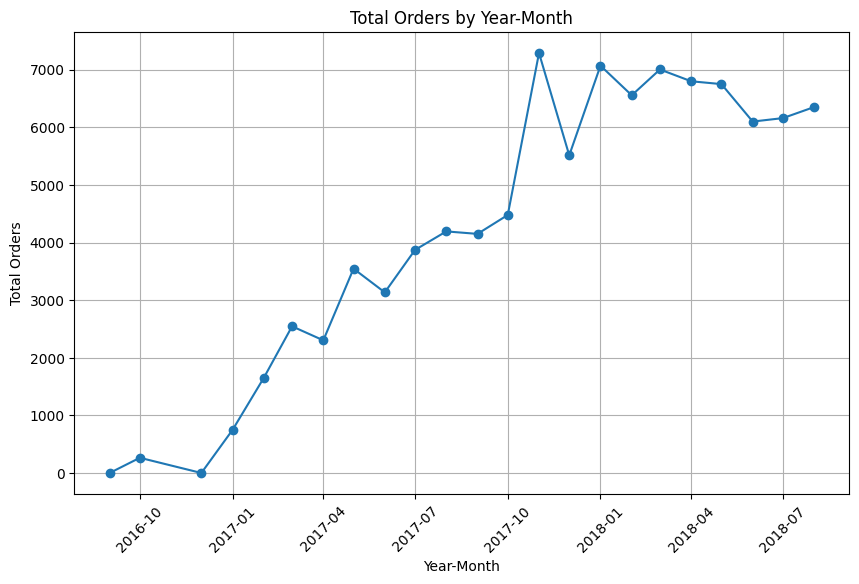

In [60]:
plt.figure(figsize=(10, 6))

plt.plot(agg_delivered_order['order_purchase_month'], agg_delivered_order['order_id'], marker='o', linestyle='-')

plt.xlabel('Year-Month')
plt.ylabel('Total Orders')
plt.title('Total Orders by Year-Month')
plt.xticks(rotation=45)
plt.grid(True)

plt.show()

### Pertanyaan 2: Top 10 cities with higher total orders and total revenue

In [61]:
agg_order_city = fact_order.groupby(['order_status','customer_city','customer_state']).agg({'order_id':pd.Series.nunique,'customer_unique_id':pd.Series.nunique,'payment_value':sum}).reset_index()
agg_order_city

,order_status,customer_city,customer_state,order_id,customer_unique_id,payment_value
0,approved,lagoa da prata,MG,1,1,61.62
1,approved,sao paulo,SP,1,1,179.46
2,canceled,abre campo,MG,1,1,110.24
3,canceled,alegrete,RS,1,1,96.80
4,canceled,americana,SP,2,2,134.00
...,...,...,...,...,...,...
5496,unavailable,vila velha,ES,1,1,258.00
5497,unavailable,vinhedo,SP,1,1,847.30
5498,unavailable,vitoria,ES,1,1,153.21
5499,unavailable,vitoria da conquista,BA,2,2,371.47


In [62]:
agg_delivered_order_city = agg_order_city.loc[agg_order_city['order_status']=='delivered']

In [63]:
top10_city_order = agg_delivered_order_city.sort_values(by='order_id', ascending=False).head(10)
top10_city_revenue = agg_delivered_order_city.sort_values(by='payment_value', ascending=False).head(10)

In [64]:
top10_city_order = top10_city_order.sort_values(by='order_id', ascending=True)
top10_city_revenue = top10_city_revenue.sort_values(by='payment_value', ascending=True)

In [65]:
top10_city_order

,order_status,customer_city,customer_state,order_id,customer_unique_id,payment_value
3795,delivered,sao bernardo do campo,SP,911,881,117199.09
1830,delivered,guarulhos,SP,1144,1111,158042.48
3597,delivered,salvador,BA,1188,1154,208759.08
3304,delivered,porto alegre,RS,1342,1292,216011.29
986,delivered,campinas,SP,1406,1363,210904.68
1433,delivered,curitiba,PR,1489,1434,239230.58
836,delivered,brasilia,DF,2071,2013,347699.93
719,delivered,belo horizonte,MG,2697,2606,408235.47
3504,delivered,rio de janeiro,RJ,6601,6361,1116902.08
3975,delivered,sao paulo,SP,15045,14528,2120918.63


In [66]:
top10_city_revenue

,order_status,customer_city,customer_state,order_id,customer_unique_id,payment_value
2785,delivered,niteroi,RJ,825,788,136142.28
1830,delivered,guarulhos,SP,1144,1111,158042.48
3597,delivered,salvador,BA,1188,1154,208759.08
986,delivered,campinas,SP,1406,1363,210904.68
3304,delivered,porto alegre,RS,1342,1292,216011.29
1433,delivered,curitiba,PR,1489,1434,239230.58
836,delivered,brasilia,DF,2071,2013,347699.93
719,delivered,belo horizonte,MG,2697,2606,408235.47
3504,delivered,rio de janeiro,RJ,6601,6361,1116902.08
3975,delivered,sao paulo,SP,15045,14528,2120918.63


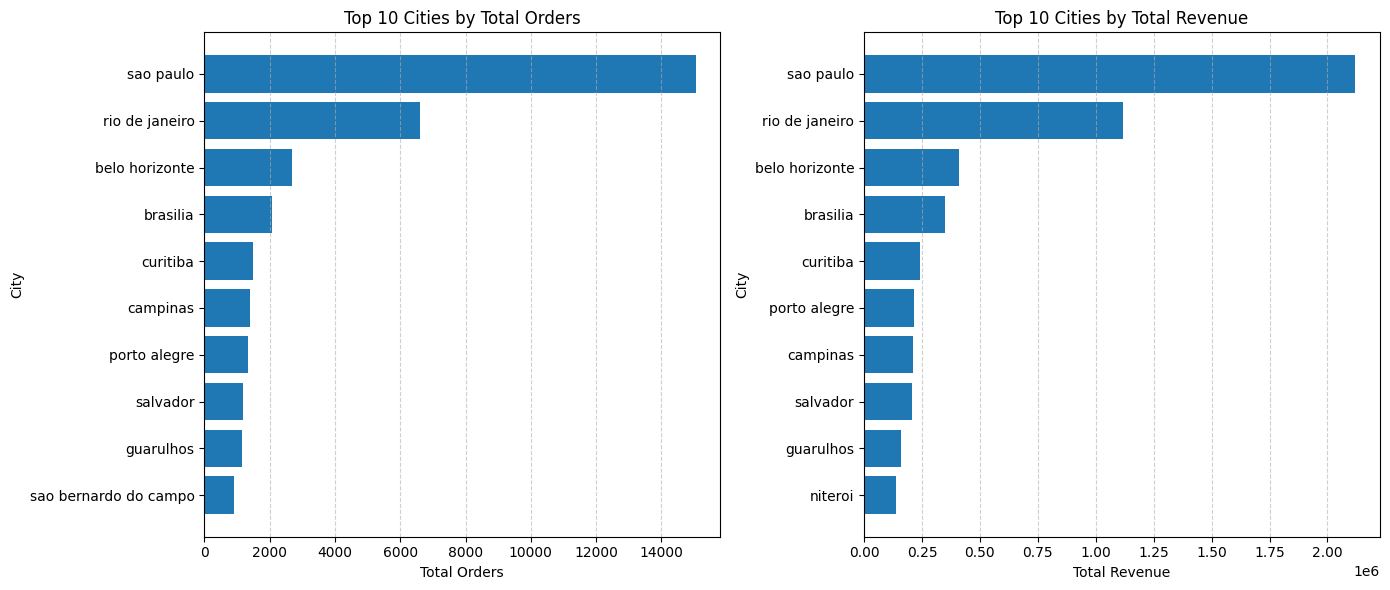

In [67]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.barh(top10_city_order['customer_city'], top10_city_order['order_id'], label='Total Orders')
ax1.set_xlabel('Total Orders')
ax1.set_ylabel('City')
ax1.set_title('Top 10 Cities by Total Orders')
ax1.grid(axis='x', linestyle='--', alpha=0.6)

ax2.barh(top10_city_revenue['customer_city'], top10_city_revenue['payment_value'], label='Total Revenue')
ax2.set_xlabel('Total Revenue')
ax2.set_ylabel('City')
ax2.set_title('Top 10 Cities by Total Revenue')
ax2.grid(axis='x', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

### Pertanyaan 3: kategori produk apa yang paling banyak diorder?

In [68]:
agg_product_category = fact_order_detail.groupby(['product_category_name_english','product_category_name']).agg({'order_id':pd.Series.nunique}).reset_index()
agg_product_category

,product_category_name_english,product_category_name,order_id
0,agro_industry_and_commerce,agro_industria_e_comercio,182
1,air_conditioning,climatizacao,253
2,art,artes,202
3,arts_and_craftmanship,artes_e_artesanato,23
4,audio,audio,350
...,...,...,...
66,stationery,papelaria,2311
67,tablets_printing_image,tablets_impressao_imagem,79
68,telephony,telefonia,4199
69,toys,brinquedos,3886


In [69]:
top10_category_order = agg_product_category.sort_values(by='order_id', ascending=False).head(10)

In [70]:
top10_category_order = top10_category_order.sort_values(by='order_id', ascending=True)

In [71]:
top10_category_order

,product_category_name_english,product_category_name,order_id
69,toys,brinquedos,3886
5,auto,automotivo,3897
68,telephony,telefonia,4199
70,watches_gifts,relogios_presentes,5624
49,housewares,utilidades_domesticas,5884
39,furniture_decor,moveis_decoracao,6449
15,computers_accessories,informatica_acessorios,6689
65,sports_leisure,esporte_lazer,7720
43,health_beauty,beleza_saude,8836
7,bed_bath_table,cama_mesa_banho,9417


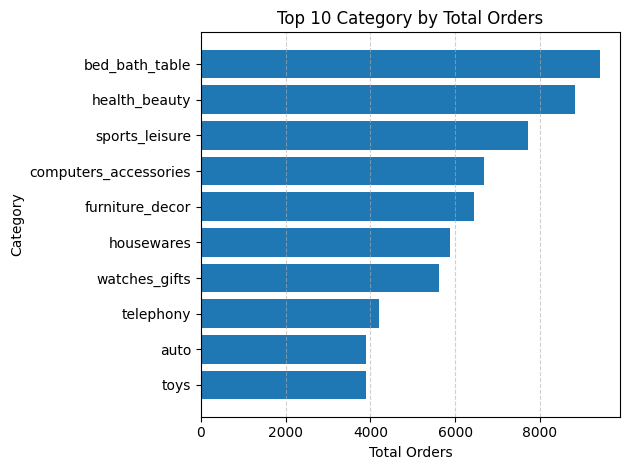

In [72]:
figsize=(14, 6)

plt.barh(top10_category_order['product_category_name_english'], top10_category_order['order_id'], label='Total Orders')
plt.xlabel('Total Orders')
plt.ylabel('Category')
plt.title('Top 10 Category by Total Orders')
plt.grid(axis='x', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

### Pertanyaan 4: kategori produk apa yang paling banyak diorder?

In [73]:
def convert_timedelta_to_hour(dataset,column):
    dataset[column] = dataset[column].dt.total_seconds() / 3600
    return dataset

In [74]:
fact_order = convert_timedelta_to_hour(fact_order,'delivery_time')
fact_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104478 entries, 0 to 104477
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_purchase_date            104478 non-null  datetime64[ns]
 1   order_id                       104478 non-null  object        
 2   customer_id                    104478 non-null  object        
 3   order_status                   104478 non-null  object        
 4   order_purchase_timestamp       104478 non-null  datetime64[ns]
 5   order_approved_at              104302 non-null  datetime64[ns]
 6   order_delivered_carrier_date   102580 non-null  datetime64[ns]
 7   order_delivered_customer_date  101324 non-null  datetime64[ns]
 8   order_estimated_delivery_date  104478 non-null  datetime64[ns]
 9   payment_sequential             104477 non-null  float64       
 10  payment_type                   104477 non-null  object        
 11  

In [75]:
fact_order['delivery_time'].mean()

224.28835082689352

<Axes: xlabel='delivery_time'>

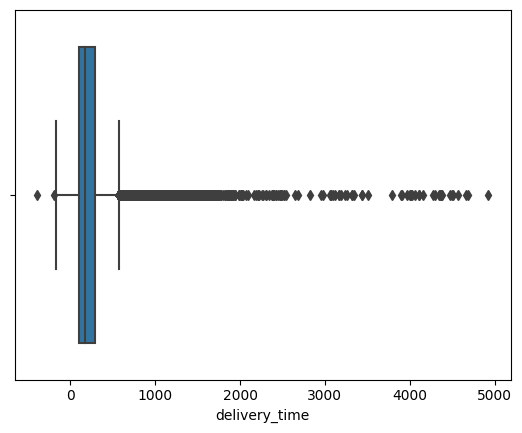

In [76]:
sns.boxplot(x=fact_order['delivery_time'])

<Axes: xlabel='delivery_time', ylabel='Density'>

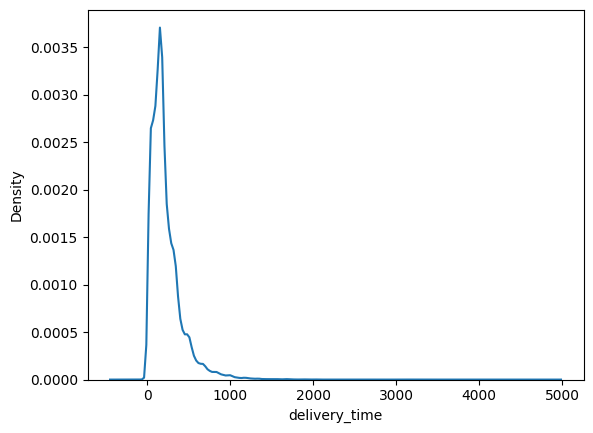

In [77]:
sns.kdeplot(x=fact_order['delivery_time'])

Distribusi delivery time pada Ecommerce Brazil ini mempunyai kemiringan ke kanan, dengan distribusi seperti ini statistik rata-rata kurang begitu akurat untuk menggambarkan ukuran pemusatan data. Untuk itu kita akan menggunakan median sebagai ukuran pemusatan data untuk delivery time

In [78]:
median_delivery_time = fact_order['delivery_time'].median()
median_delivery_time

170.51416666666665

In [79]:
days = int(median_delivery_time // 24)
hours = int(median_delivery_time % 24)

print(f"{days} days {hours} hours")

7 days 2 hours


median order delivery time is 7 days 2 hours

## Conclusion

- Trend bulanan total orders pada Ecommerce Brazil selama 2 tahun mulai dari September 2016 mempunyai trend yang baik, total orders cenderung naik pada tiap bulannya dari puluhan order pada September menjadi lebih dari 6000 order pada Agustus 2018
- Top 10 kota dengan total order dan total revenue terbesar dapat dilihat pada Gambar 2. Sao Paulo menduduki peringkat pertama dengan 14k delivered order dan total transaksi sebesar $2 million, diikuti oleh Rio de janeiro dengan tidak lebih dari setengah total delivered order dan total transaksi dari Sao Paulo
- Top 3 kategori produk yang diorder oleh customer adalah bed_bath_table, health_beauty, dan sport_leissure, ketiganya dipesan lebih dari 7k kali
- Durasi pengiriman pada Ecommerce Brazil ini rata-rata memerlukan waktu 7 hari dari pesanan diserahkan ke kurir sampai pesanan diterima oleh customer
- Terdapat 8% delivered order yang melebihi estimasi pengiriman

# Export fact_order dataset for dashboard

In [80]:
fact_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104478 entries, 0 to 104477
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_purchase_date            104478 non-null  datetime64[ns]
 1   order_id                       104478 non-null  object        
 2   customer_id                    104478 non-null  object        
 3   order_status                   104478 non-null  object        
 4   order_purchase_timestamp       104478 non-null  datetime64[ns]
 5   order_approved_at              104302 non-null  datetime64[ns]
 6   order_delivered_carrier_date   102580 non-null  datetime64[ns]
 7   order_delivered_customer_date  101324 non-null  datetime64[ns]
 8   order_estimated_delivery_date  104478 non-null  datetime64[ns]
 9   payment_sequential             104477 non-null  float64       
 10  payment_type                   104477 non-null  object        
 11  

In [81]:
column_to_save = ['order_purchase_date','order_purchase_month','order_id','order_status','delivery_time','delivery_status','payment_value','customer_unique_id','customer_city','customer_state']
fact_order[column_to_save].to_csv('fact_order_data.csv')